# ***Yas Patel***


---


## Internship_Task001

> ### Prediction using Supervised ML
---
> ### Comparision of Supervised ML using Scikit and using Numpy and Pandas





## Linear Regression Prediction using Numpy and Pandas

### Import Appropriote Libraries 

In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#visualization libraries
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4)

print('Imported Usefull Libraries')

Imported Usefull Libraries


### Import Dataset

In [64]:
data_path = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(data_path)

#### Check the data is Imported as expected or not

In [65]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Visualize the data

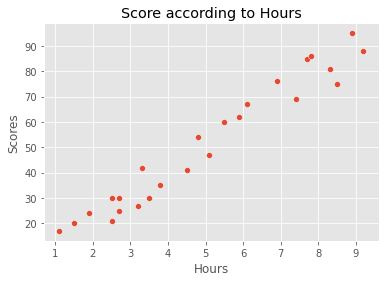

In [67]:
ax = sns.scatterplot(x='Hours', y='Scores', data=data)
ax.set_title("Score according to Hours");

#### Here, far we can see that we have only two variables, and we want to know about co-realtions between them so we have to use scatter-plot which is shown above. 

#### Another interesting is that from the plot , it shows the positive realtionship between them

### Computing Cost function

The objective of linear regression is ***to minimize the cost function***

> $$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

>  $$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$





In [68]:
def cost_function(x, y, theta ) : 
    m = len(y)
    y_pred = x.dot(theta)
    
    fn =  ( y_pred - y )**2
    
    cost = 1 / ( (2*m)* np.sum(fn))
    
    return cost

m = data.Hours.values.size 
x = np.append(np.ones((m,1)), data.Hours.values.reshape(m, 1), axis=1) 
y = data.Scores.values.reshape(m,1)
theta = np.zeros((2,1))

cost_function(x,y,theta)

2.450950356000539e-07

### Computing Batch Gradient Decent 

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
> $\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).




---


#### Defining the gradient descent function 

In [69]:
def gradient_descent(x, y, theta, alpha, iters) :
    m = len(y)
    # tracking the history of all Costs in costs list
    costs = []
    for i in range(iters) :
        y_pred = x.dot(theta)
        fn = np.dot(x.T, (y_pred - y))
        theta -= alpha*1/m*np.sum(fn)
        costs.append(cost_function(x,y,theta))
    return theta,costs

theta, costs = gradient_descent(x, y, theta, alpha=0.01, iters=1000)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)),
                                str(round(theta[1, 0], 2))))

h(x) = 8.74 + 8.74x1


###  Visualizing cost function

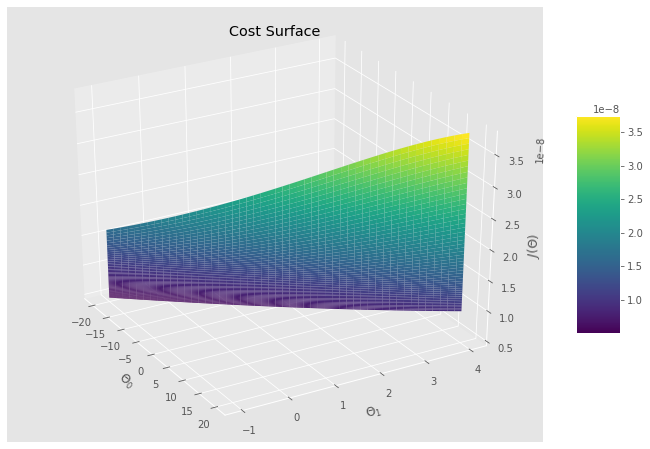

In [70]:
from mpl_toolkits.mplot3d import Axes3D

theta_0 = np.linspace(-20,20,1000)
theta_1 = np.linspace(-1,4,1000)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(x, y, t)
        
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = "viridis", linewidth = 0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.set_title("Cost Surface")
ax.view_init(30,330)

plt.show()

### Training Data with Linear Regression Fit

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


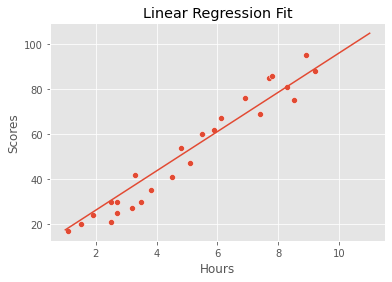

In [71]:
theta = np.squeeze(theta)
sns.scatterplot(x ="Hours", y= "Scores", data = data)

x_value=[x for x in range(1, 12)]
y_value=[(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)

plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Linear Regression Fit");

### Final Prediction

$h_\theta(x) = \theta^Tx$

In [72]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [73]:
x1 = 7.8
y_pred_1 = predict(np.array([1, x1]),theta) 

print("Score [ for Hours studied {x1} ] = ".format(x1=x1) + str(round(y_pred_1, 5)))

Score [ for Hours studied 7.8 ] = 76.89912


## Linear Regression Prediction using ***scikit learn***

## Import useful libraries

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Split the data

In [75]:
# Import the dataset
dataset = pd.read_csv(data_path)

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Split the dataset into the training set and test set
# We're splitting the data in 1/3, so out of 30 rows, 20 rows will go into the training set,
# and 10 rows will go into the testing set.
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)

## Train the model

In [76]:
linearRegressor = LinearRegression()

In [77]:
linearRegressor.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
yPrediction = linearRegressor.predict(xTest)

### Visualizing the Training and Test set

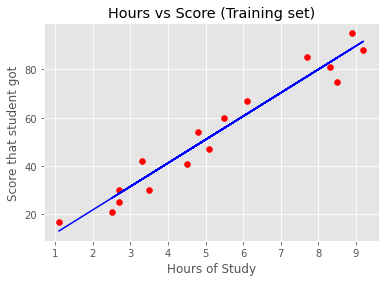

In [79]:
plot.scatter(xTrain, yTrain, color = 'red')
plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plot.title('Hours vs Score (Training set)')
plot.xlabel('Hours of Study')
plot.ylabel('Score that student got')
plot.show()

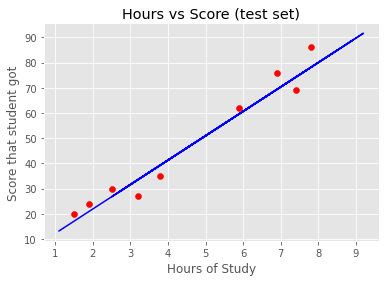

In [80]:
plot.scatter(xTest, yTest, color = 'red')
plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plot.title('Hours vs Score (test set)')
plot.xlabel('Hours of Study')
plot.ylabel('Score that student got')
plot.show()

In [81]:
linearRegressor.score(x, y)

0.9526104408489621

#### Accuracy of the model is : 0.95 %

### Let's Predict and see that how much it varies from our previous prediction

In [82]:
#Predict score for 9.6 hours of study
hours = 7.8
pred_hours = linearRegressor.predict([[hours]])
print("No of Hours Studied by student = {}".format(hours))
print("Predicted Score = {}".format(pred_hours[0]))

No of Hours Studied by student = 7.8
Predicted Score = 78.09382734382734


### Conclusion
#### If we compare both score it is not excatly the same but we can improve our gradient decent in order to minimize the distance.